# COS3a Übung 7
---
Abgabe bis 29.11.2022 12:00 Uhr

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Übung

### Aufgabe 13 (2 Punkte)

#### Theorie

In der Übung und Vorlesung haben Sie den Random Walker kennengelernt. Durch Defekte kann es in Festkörpern zu mobilen Ionen kommen, die sich durch das Prinzip des Random Walkers beschreiben lassen. Anders als bisher vorgestellt, müssen die Ionen jedoch meist eine energetische Barriere überwinden, um von einer Gitterposition zur Nächsten wechseln zu können. Zudem können benachbarte Dotieratome diese Barriere beeinflussen. Beispielsweise können bei entgegengesetzter Ladung zwischen Defekt und Dotieratom energetische Assoziationen herrschen.

In Ceroxid $\mathrm{CeO}_2$ z.B. lassen sich durch Yttriumdotierung Leerstellen auf den Sauerstoffplätzen erzeugen. Hierdurch werden die Sauerstoffionen mobil und können sich bei genügend hoher Temperatur durch den Kristall bewegen. Da die Cerionen eine Oxidationsstufe von +4 und die Yttriumionen von +3 besitzen, besteht eine positive Assoziation zwischen den Leerstellen und den Yttriumionen. Dies führt zu einem sogenannten *Trapping*: Die Leerstellen werden gefangen und erst durch Überwinden einer hohen energetischen Barriere wieder frei. Dadurch wird die Sauerstoffmobilität verringert.

In dieser Übung soll ein eindimensionales System mit analogen Eigenschaften zum Ceroxid-System simuliert werden (siehe Abbildung 1).

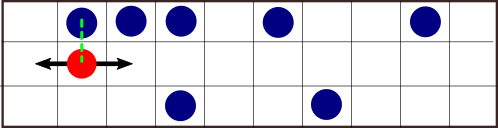

<font size="1"><center>Abbildung 1: Sauerstoffleerstelle (rot) im eindimensionalen Gitter mit benachbarten anziehenden Dotieratome (blau). Reguläre Atome werden nicht gezeigt.</center></font>

Hierzu soll der Random Walker eine Sauerstoffleerstelle sein, die sich nach links und rechts bewegen kann. Versucht der Walker aus einer Seite des Gitters auszutreten, soll er auf der anderen wieder eintreten (periodische Randbedingung). Ober- und unterhalb sollen sich Dotieratome befinden können, die eine positive Assoziation zur Leerstelle besitzen. Wenn der Walker zu einer Seite migrieren möchte, muss die Barriere $E_\mathrm{mig}$ überwunden werden. Diese setzt sich zusammen aus einer Basismigrationsenergie $E_\mathrm{mig}^0$, die unabhängig von der Umgebung ist, und einem Energiebeitrag, der sich aus der Ausgangs- $E_\mathrm{Start}$ und Endenergie berechnet $E_\mathrm{Ende}$:

\begin{equation}
E_\mathrm{mig} = E_\mathrm{mig}^0 + \frac{E_\mathrm{Ende} - E_\mathrm{Start}}{2}
\tag{1}
\end{equation}

Der Random Walker soll nur mit den Atomen direkt oberhalb und unterhalb wechselwirken. $E_\mathrm{Start}$ und $E_\mathrm{Ende}$ berechnet sich daher durch:

\begin{equation}
E_\mathrm{Start/Ende} = N_\mathrm{Dotieratome} \cdot \varepsilon_\mathrm{inter},
\tag{2}
\end{equation}

wobei $N_\mathrm{Dotieratome}$ der Zahl der Dotieratome direkt oberhalb und unterhalb der Ausgangs-, bzw. Endposition entspricht und $\varepsilon_\mathrm{inter}$ die Assoziationsenergie ist.

Aufgrund der Migrationsbarriere führt nicht jeder Sprungversuch zu einer Migration. Die Wahrscheinlichkeit für einen erfolgreichen Sprung lässt sich durch die Boltzmann-Wahrscheinlichkeit $P_\mathrm{Sprung}$ beschreiben:

\begin{equation}
P_\mathrm{Sprung} = \exp\left(-\frac{E_\mathrm{mig}}{k_\mathrm{B} T}\right),
\tag{3}
\end{equation}

wobei $T$ die Temperatur und $k_\mathrm{B}$ die Boltzmannkonstante ist.

Ein Maß für die Beweglichkeit ist der Diffusionskoeffizient, welcher sich nach Einstein aus der quadratisch gemittelten Verschiebung $\left\langle R^2 \right\rangle$ nach der Zeit $t$ ergibt:

\begin{equation}
D = \frac{\left \langle R^2 \right \rangle}{2dt} ,
\tag{4}
\end{equation}

wobei $d$ der Dimension des Systems entspricht.

### Aufgabe

#### a)

Welchen Diffusionskoeffizienten der Leerstelle erwaten Sie für ein System ohne Dotieratome? Verwenden Sie folgende Parameter:

 Parameter                         | Wert
 :---:                             | :---:
 $$E_\mathrm{mig}^0$$              | $$0.2 \text{ eV}$$
 Sprunglänge                       | $$2 \cdot 10^{-10} \text{ m}$$
 Versuchsfrequenz                  | $$10^{13}\ \mathrm{s^{-1}}$$
 Temperatur                        | $$1000 \text{ K}$$

#### b)

Implementieren Sie das vorgestellte Modell und simulieren Sie die Bewegung der Leerstelle. Als Abbruchkriterium soll  die Zahl erfolgreicher Zustandsänderungen (MCS - hier Anzahl der Sprünge) dienen. Nehmen Sie die Zeit und die Entfernung der Leerstelle zum Ursprung auf und berechnen Sie den daraus resultierenden Diffusionskoeffizienten der Leerstelle. Mitteln Sie Ihr Ergebnis über 10 Simulationen:

\begin{equation}
D = \frac{1}{2} \left \langle \frac{ R^2 }{t}\right \rangle
\tag{5}
\end{equation}

Verwenden Sie die folgenden zusätzlichen Parameter:


 Parameter                         | Wert
 :---:                             | :---:
 Gitterlänge                       | $$20$$ 
 Zahl der Dotieratome              | $$10$$
 $$\varepsilon_\mathrm{as}$$       | $$-0.05 \text{ eV}$$
 MCS                               | $$1000000$$

Sie dürfen die Dotieratome beliebig anordnen.

Tipps:

- Der Random Walker kann sich nach links oder rechts bewegen. Beachten Sie die periodische Randbedingung!
- Ob ein Sprung erfolgreich ist, wird wieder mithilfe einer Zufallszahl zwischen 0 und 1 überprüft.
- Stellen Sie das Gitter als 2D Liste dar.
- Stellen Sie die Anwesenheit eines Dotieratoms durch 1, bzw. die Abwesenheit durch 0 dar. Das macht die Berechnung von $E_\mathrm{Start}$ und $E_\mathrm{Ende}$ etwas einfacher.
- Die zurückgelegte Distanz ergibt sich aus der Summe der Sprungvektoren. (Die periodische Randbedingung soll einen unendlichen Kristall darstellen. Sie können also zur Bestimmung der Distanz nicht die Differenz zwischen Ausgangs- und Endposition - also der Indexe - verwenden.)
- Die Zeit ergibt sich aus der Summe der Sprungversuche. Sie müssen letztere also mitzählen.
- Probieren Sie Ihre Simulation erst mit wenigen MCS.

**Geben Sie in dieser Übung wieder nur das Notebook mit ausgeführtem Code ab! Sie brauchen keine PDF erzeugen.**